In [1]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

def texture_analysis(image_path):
    # Read the binary image
    binary_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Local Binary Pattern (LBP) for texture analysis
    radius = 3
    n_points = 5 * radius
    lbp_img = local_binary_pattern(binary_img, n_points, radius, method='uniform')

    # Flatten and normalize the LBP features
    lbp_features = lbp_img.flatten()
    normalized_features = MinMaxScaler().fit_transform(lbp_features.reshape(-1, 1)).flatten()

    # Return the mean or sum of the normalized LBP features
    return normalized_features.mean()  # or use .sum()

# List of image paths
image_paths = [
    'thresholded copy/colon_nt/colon_n/binary3/colonn2.jpeg',
    'thresholded copy/colon_nt/colon_n/binary3/colonn10.jpeg',
    'thresholded copy/colon_acat/colon_aca/binary3/colonca8.jpeg'
]

# Create an empty DataFrame to store features
df_features = pd.DataFrame()

# Apply texture analysis to each image
for image_path in image_paths:
    # Get normalized LBP features
    normalized_feature = texture_analysis(image_path)

    # Add the feature to the DataFrame
    df_features = pd.concat([df_features, pd.DataFrame([normalized_feature])], axis=0, ignore_index=True)

# Print the DataFrame with a single value for each image
print(df_features)



          0
0  0.695163
1  0.677912
2  0.683695


In [3]:
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize

def extract_morphological_features(image_path):
    # Read the original image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find contours in the original image
    contours_original, _ = cv2.findContours(original_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate area and perimeter of the segmented regions in the original image
    total_area_original = np.sum(cv2.contourArea(contour) for contour in contours_original)
    perimeter_original = np.sum(cv2.arcLength(contour, True) for contour in contours_original)

    # Threshold the original image
    _, binary_skeleton_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY)

    # Ensure that the binary_skeleton_original is not None before proceeding
    if binary_skeleton_original is not None:
        # Use skeletonize from skimage.morphology for skeletonization
        skeleton_original = skeletonize(binary_skeleton_original)

        elongation_original = np.sum(skeleton_original) / (np.sum(original_img) + 1e-5)

        # Calculate compactness using area and perimeter in the original image
        compactness_original = (perimeter_original ** 2) / (4 * np.pi * total_area_original + 1e-5)

        # Detect and count holes in structures in the original image
        _, binary_inv_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY_INV)
        _, holes_img_original = cv2.connectedComponents(binary_inv_original)
        num_holes_original = np.max(holes_img_original)

        # Create a DataFrame to store the features
        df_features = pd.DataFrame({
            'Area': [total_area_original],
            'Perimeter': [perimeter_original],
            'Elongation': [elongation_original],
            'Compactness': [compactness_original],
            'Num_Holes': [num_holes_original]
        })

        # Print and return the DataFrame
        print("\nFeature Extraction Results:")
        print(f"Image: {image_path}")
        for column, value in df_features.iloc[0].items():
            print(f"{column}: {value}")
        return df_features
    else:
        print(f"Error processing image: {image_path}")
        return None

# List of image paths
image_paths = [
    'thresholded copy/colon_nt/colon_n/binary3/colonn2.jpeg',
    'thresholded copy/colon_nt/colon_n/binary3/colonn10.jpeg',
    'thresholded copy/colon_acat/colon_aca/binary3/colonca8.jpeg'
]

# Create an empty DataFrame to store features for all images
df_all_features = pd.DataFrame()

# Extract and compare features for each image
for image_path in image_paths:
    df_features = extract_morphological_features(image_path)
    if df_features is not None:
        df_all_features = pd.concat([df_all_features, df_features], ignore_index=True)

# Print the DataFrame with all features
print(df_all_features)




Feature Extraction Results:
Image: thresholded copy/colon_nt/colon_n/binary3/colonn2.jpeg
Area: 65025.0
Perimeter: 1020.0
Elongation: 0.001020236797129779
Compactness: 1.273239544719581
Num_Holes: 306.0

Feature Extraction Results:
Image: thresholded copy/colon_nt/colon_n/binary3/colonn10.jpeg
Area: 65025.0
Perimeter: 1020.0
Elongation: 0.0009862099222399535
Compactness: 1.273239544719581
Num_Holes: 323.0

Feature Extraction Results:
Image: thresholded copy/colon_acat/colon_aca/binary3/colonca8.jpeg
Area: 65016.0
Perimeter: 1027.798989534378
Elongation: 0.0011467840930768501
Compactness: 1.2929634909045942
Num_Holes: 199.0
      Area   Perimeter  Elongation  Compactness  Num_Holes
0  65025.0  1020.00000    0.001020     1.273240        306
1  65025.0  1020.00000    0.000986     1.273240        323
2  65016.0  1027.79899    0.001147     1.292963        199


/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_6630/2692790489.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_area_original = np.sum(cv2.contourArea(contour) for contour in contours_original)
/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_6630/2692790489.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  perimeter_original = np.sum(cv2.arcLength(contour, True) for contour in contours_original)


In [4]:
# Print the DataFrame with all features
print("Feature Extraction Results:")
print(df_all_features)


Feature Extraction Results:
      Area   Perimeter  Elongation  Compactness  Num_Holes
0  65025.0  1020.00000    0.001020     1.273240        306
1  65025.0  1020.00000    0.000986     1.273240        323
2  65016.0  1027.79899    0.001147     1.292963        199


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

def extract_morphological_features(image_path):
    # Read the original image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find contours in the original image
    contours_original, _ = cv2.findContours(original_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate area and perimeter of the segmented regions in the original image
    total_area_original = np.sum(cv2.contourArea(contour) for contour in contours_original)
    perimeter_original = np.sum(cv2.arcLength(contour, True) for contour in contours_original)

    # Threshold the original image
    _, binary_skeleton_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY)

    # Ensure that the binary_skeleton_original is not None before proceeding
    if binary_skeleton_original is not None:
        # Use skeletonize from skimage.morphology for skeletonization
        skeleton_original = skeletonize(binary_skeleton_original)

        elongation_original = np.sum(skeleton_original) / (np.sum(original_img) + 1e-5)

        # Calculate compactness using area and perimeter in the original image
        compactness_original = (perimeter_original ** 2) / (4 * np.pi * total_area_original + 1e-5)

        # Detect and count holes in structures in the original image
        _, binary_inv_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY_INV)
        _, holes_img_original = cv2.connectedComponents(binary_inv_original)
        num_holes_original = np.max(holes_img_original)

        # Create a DataFrame to store the features
        df_features = pd.DataFrame({
            'Area': [total_area_original],
            'Perimeter': [perimeter_original],
            'Elongation': [elongation_original],
            'Compactness': [compactness_original],
            'Num_Holes': [num_holes_original],
            'LBP': [np.nan]  # Placeholder for LBP feature
        })

        return df_features
    else:
        print(f"Error processing image: {image_path}")
        return None

def texture_analysis(image_path):
    # Read the binary image
    binary_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Local Binary Pattern (LBP) for texture analysis
    radius = 3
    n_points = 5 * radius
    lbp_img = local_binary_pattern(binary_img, n_points, radius, method='uniform')

    # Flatten and normalize the LBP features
    lbp_features = lbp_img.flatten()
    normalized_features = MinMaxScaler().fit_transform(lbp_features.reshape(-1, 1)).flatten()

    # Return the mean or sum of the normalized LBP features
    return normalized_features.mean()  # or use .sum()

def process_images_in_directory(directory_path):
    # List all files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.jpeg')]

    # Create an empty DataFrame to store features
    df_features = pd.DataFrame()

    # Process each image in the directory
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)

        # Extract morphological features
        morphological_features = extract_morphological_features(image_path)

        # Extract LBP feature
        lbp_feature = texture_analysis(image_path)

        # Add the features to the DataFrame
        if morphological_features is not None:
            morphological_features['LBP'] = lbp_feature
            df_features = pd.concat([df_features, morphological_features], ignore_index=True)

    return df_features

# Specify the directories for image processing
directories = [
    'thresholded copy/colon_acat/colon_aca/binary3',
    'thresholded copy/colon_nt/colon_n/binary3'
]

# Process images in each directory
df_all_features = pd.DataFrame()
for directory in directories:
    df_features = process_images_in_directory(directory)
    df_all_features = pd.concat([df_all_features, df_features], ignore_index=True)

# Print the top 10 rows of the DataFrame
print("\nTop 10 Rows of Feature Extraction Results:")
print(df_all_features.head(10))


/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_area_original = np.sum(cv2.contourArea(contour) for contour in contours_original)
/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  perimeter_original = np.sum(cv2.arcLength(contour, True) for contour in contours_original)
/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_area_original = np.sum(cv2


Top 10 Rows of Feature Extraction Results:
      Area    Perimeter  Elongation  Compactness  Num_Holes       LBP
0  65024.0  1020.828427    0.001055     1.275328        398  0.693789
1  65024.0  1020.828427    0.001231     1.275328        489  0.695010
2  65019.0  1023.313708    0.001337     1.281644        372  0.694254
3  65020.5  1023.071068    0.001424     1.281007        396  0.698413
4  65021.0  1023.313708    0.000963     1.281605        263  0.681879
5  65019.5  1023.899495    0.001016     1.283102        157  0.683670
6  65025.0  1020.000000    0.001241     1.273240        269  0.686408
7  65024.0  1020.828427    0.001106     1.275328        313  0.685572
8  65023.0  1020.828427    0.001335     1.275348        328  0.692693
9  65013.5  1029.556349    0.001180     1.297439        268  0.698290


/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_area_original = np.sum(cv2.contourArea(contour) for contour in contours_original)
/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  perimeter_original = np.sum(cv2.arcLength(contour, True) for contour in contours_original)
/var/folders/2s/dv36fzps00125mc_rszwwyfm0000gn/T/ipykernel_71686/498105621.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_area_original = np.sum(cv2

In [7]:
print(df_all_features.tail(10))


         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP
9990  65016.5  1024.727922    0.001117     1.285238        350  0.682204
9991  65024.0  1020.828427    0.000905     1.275328        203  0.679871
9992  65025.0  1020.000000    0.001187     1.273240        334  0.684965
9993  65023.0  1021.656854    0.000899     1.277419        216  0.689936
9994  65021.0  1023.656854    0.000498     1.282464         65  0.695876
9995  65024.0  1020.828427    0.000818     1.275328        252  0.695255
9996  65024.0  1020.828427    0.001028     1.275328        255  0.676693
9997  65025.0  1020.000000    0.000959     1.273240        238  0.683407
9998  65023.0  1021.656854    0.000974     1.277419        197  0.682471
9999  65019.0  1025.313708    0.001020     1.286659        331  0.688683


In [4]:
print(df_all_features.tail(10))


         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP
9990  65016.5  1024.727922    0.001117     1.285238        350  0.682204
9991  65024.0  1020.828427    0.000905     1.275328        203  0.679871
9992  65025.0  1020.000000    0.001187     1.273240        334  0.684965
9993  65023.0  1021.656854    0.000899     1.277419        216  0.689936
9994  65021.0  1023.656854    0.000498     1.282464         65  0.695876
9995  65024.0  1020.828427    0.000818     1.275328        252  0.695255
9996  65024.0  1020.828427    0.001028     1.275328        255  0.676693
9997  65025.0  1020.000000    0.000959     1.273240        238  0.683407
9998  65023.0  1021.656854    0.000974     1.277419        197  0.682471
9999  65019.0  1025.313708    0.001020     1.286659        331  0.688683


In [18]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

# Your existing feature DataFrame


# Function to extract information from file paths
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    labels = 'label_' + str(index)
    filename = 'file_' + str(index)

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                       images        labels     filename  \
0           your_directory/label_0.0/file_0.0     label_0.0     file_0.0   
1           your_directory/label_1.0/file_1.0     label_1.0     file_1.0   
2           your_directory/label_2.0/file_2.0     label_2.0     file_2.0   
3           your_directory/label_3.0/file_3.0     label_3.0     file_3.0   
4           your_directory/label_4.0/file_4.0     label_4.0     file_4.0   
...                                       ...           ...          ...   
9995  your_directory/label_9995.0/file_9995.0  label_9995.0  file_9995.0   
9996  your_directory/label_9996.0/file_9996.0  label_9996.0  file_9996.0   
9997  your_directory/label_9997.0/file_9997.0  label_9997.0  file_9997.0   
9998  your_directory/label_9998.0/file_9998.0  label_9998.0  file_9998.0   
9999  your_directory/label_9999.0/file_9999.0  label_9999.0  file_9999.0   

         Area    Perimeter  Elongation  Compactness  Num_Holes    

In [19]:
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    filename = 'file_' + str(index)

    # Set labels based on index
    labels = 'adenocarcinoma' if index < 5000 else 'benign'

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                    images          labels   filename  \
0     your_directory/adenocarcinoma/file_0  adenocarcinoma     file_0   
1     your_directory/adenocarcinoma/file_1  adenocarcinoma     file_1   
2     your_directory/adenocarcinoma/file_2  adenocarcinoma     file_2   
3     your_directory/adenocarcinoma/file_3  adenocarcinoma     file_3   
4     your_directory/adenocarcinoma/file_4  adenocarcinoma     file_4   
...                                    ...             ...        ...   
9995       your_directory/benign/file_9995          benign  file_9995   
9996       your_directory/benign/file_9996          benign  file_9996   
9997       your_directory/benign/file_9997          benign  file_9997   
9998       your_directory/benign/file_9998          benign  file_9998   
9999       your_directory/benign/file_9999          benign  file_9999   

         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP  
0     65024.0  1020.828427 

In [20]:
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    filename = 'file_' + str(index)

    # Set labels based on index
    labels = 'adenocarcinoma' if index < 5000 else 'benign'

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                    images          labels   filename  \
0     your_directory/adenocarcinoma/file_0  adenocarcinoma     file_0   
1     your_directory/adenocarcinoma/file_1  adenocarcinoma     file_1   
2     your_directory/adenocarcinoma/file_2  adenocarcinoma     file_2   
3     your_directory/adenocarcinoma/file_3  adenocarcinoma     file_3   
4     your_directory/adenocarcinoma/file_4  adenocarcinoma     file_4   
...                                    ...             ...        ...   
9995       your_directory/benign/file_9995          benign  file_9995   
9996       your_directory/benign/file_9996          benign  file_9996   
9997       your_directory/benign/file_9997          benign  file_9997   
9998       your_directory/benign/file_9998          benign  file_9998   
9999       your_directory/benign/file_9999          benign  file_9999   

         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP  
0     65024.0  1020.828427 

In [21]:
import os

# Function to fix image paths based on labels
def fix_image_paths(row):
    if row['labels'] == 'adenocarcinoma':
        directory = '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3'
        filename = 'colonca' + str(row.name) + '.jpeg'
    elif row['labels'] == 'benign':
        directory = '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3'
        filename = 'colonn' + str(row.name - 5000) + '.jpeg'
    else:
        return 'Invalid Label'

    image_path = os.path.join(directory, filename)
    return image_path

# Apply the function to fix image paths
df_all_features['images'] = df_all_features.apply(fix_image_paths, axis=1)

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)



Modified DataFrame:
                                                 images          labels  \
0     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
1     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
2     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
3     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
4     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
...                                                 ...             ...   
9995  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9996  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9997  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9998  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9999  /Users/jazlyn/dip project/thresholded copy/col...          benign   

       filename     Area    Perimeter  Elongation  Compactness  Num_Holes  \
0

In [22]:
import os

# Function to fix image paths based on labels
def fix_image_paths(row):
    if row['labels'] == 'adenocarcinoma':
        directory = '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3'
        filename = 'colonca' + str(int(row.name) + 1) + '.jpeg'
    elif row['labels'] == 'benign':
        directory = '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3'
        filename = 'colonn' + str(int(row.name) - 5000 + 1) + '.jpeg'
    else:
        return 'Invalid Label'

    image_path = os.path.join(directory, filename)
    return image_path

# Apply the function to fix image paths
df_all_features['images'] = df_all_features.apply(fix_image_paths, axis=1)

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)



Modified DataFrame:
                                                 images          labels  \
0     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
1     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
2     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
3     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
4     /Users/jazlyn/dip project/thresholded copy/col...  adenocarcinoma   
...                                                 ...             ...   
9995  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9996  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9997  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9998  /Users/jazlyn/dip project/thresholded copy/col...          benign   
9999  /Users/jazlyn/dip project/thresholded copy/col...          benign   

       filename     Area    Perimeter  Elongation  Compactness  Num_Holes  \
0

In [23]:
# Specify the file path where you want to save the CSV file
csv_file_path = '/Users/jazlyn/dip project/df_all_features.csv'

# Save the DataFrame to a CSV file
df_all_features.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")


DataFrame saved to /Users/jazlyn/dip project/df_all_features.csv


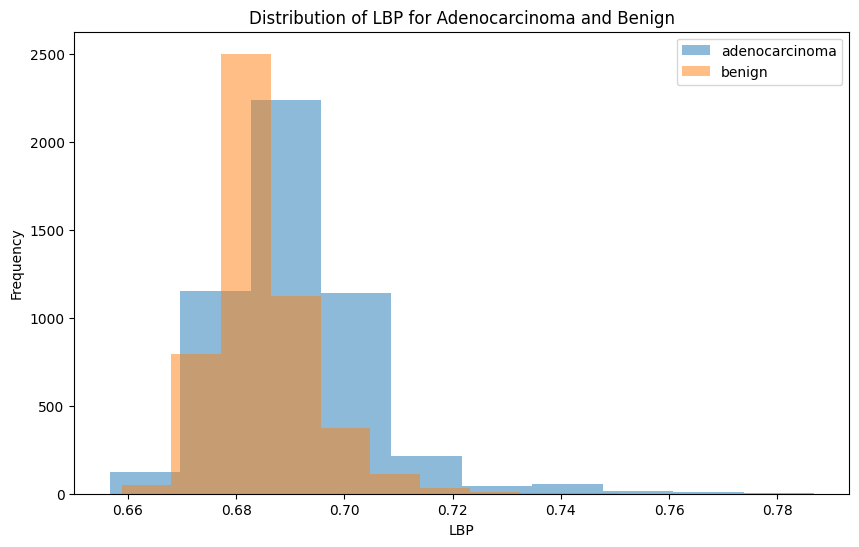

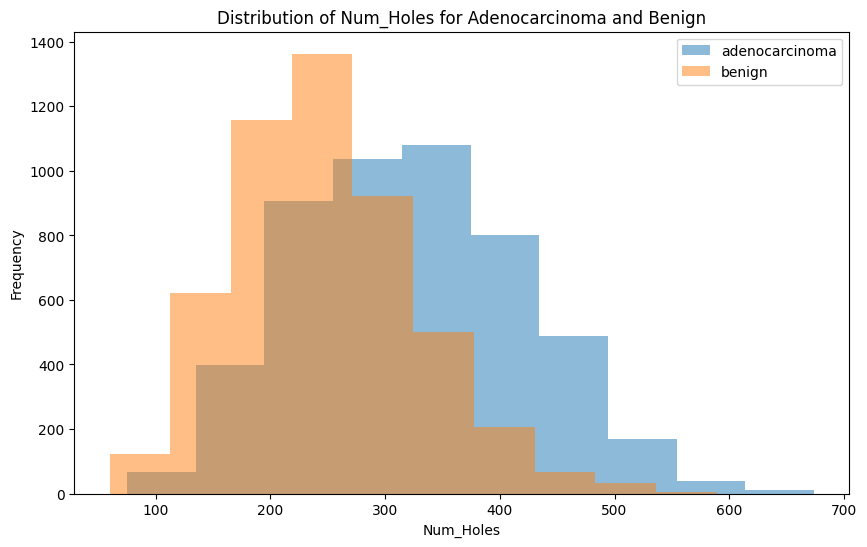

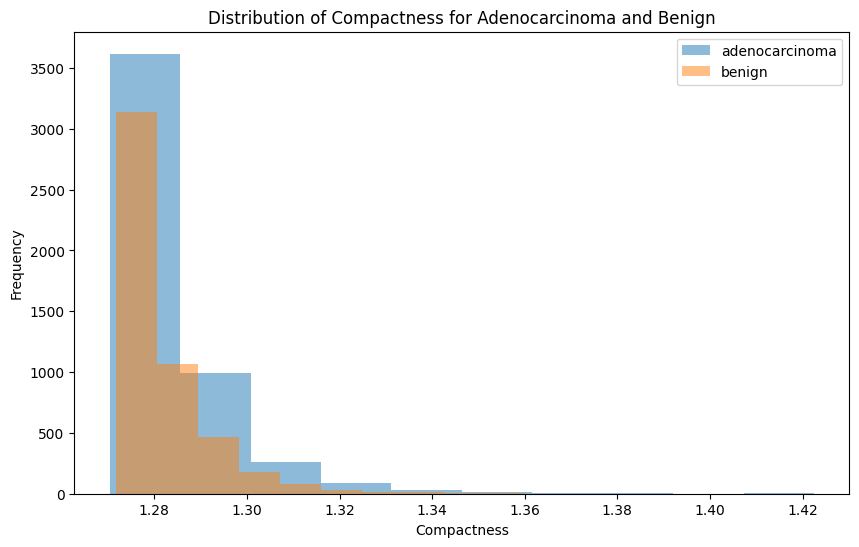

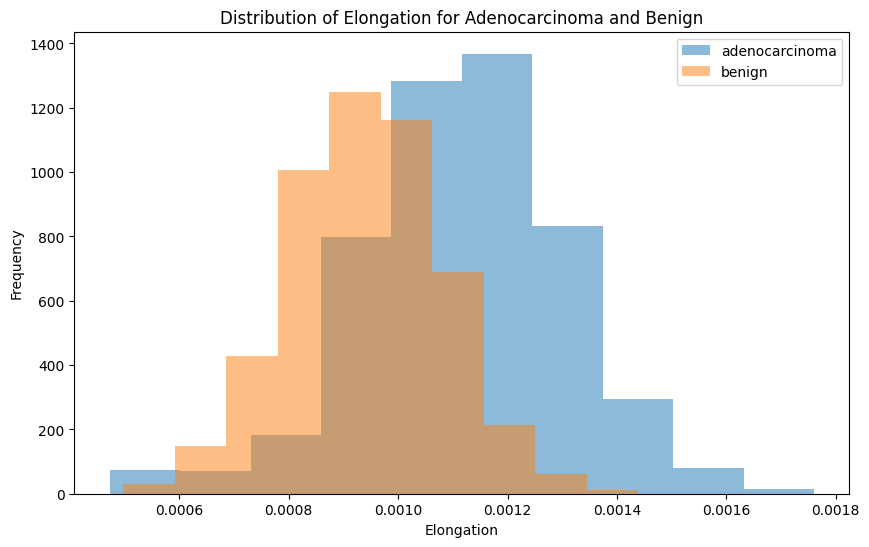

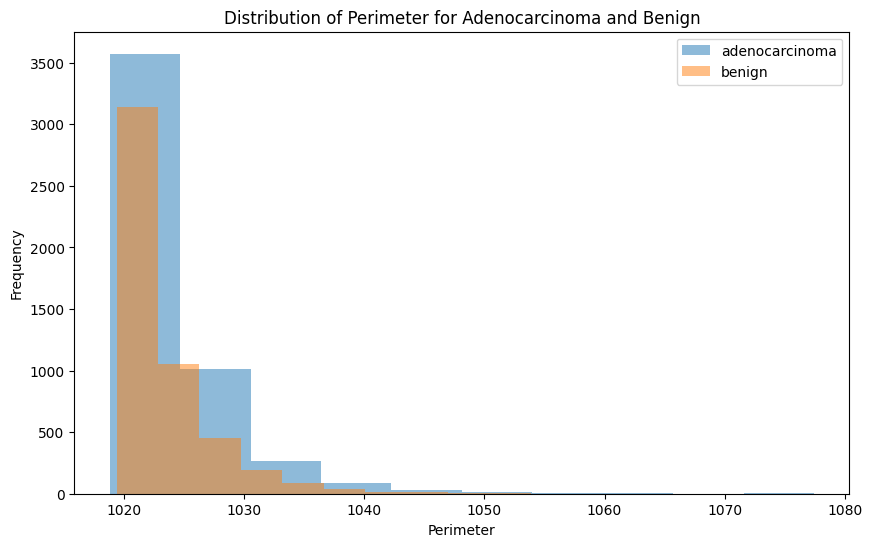

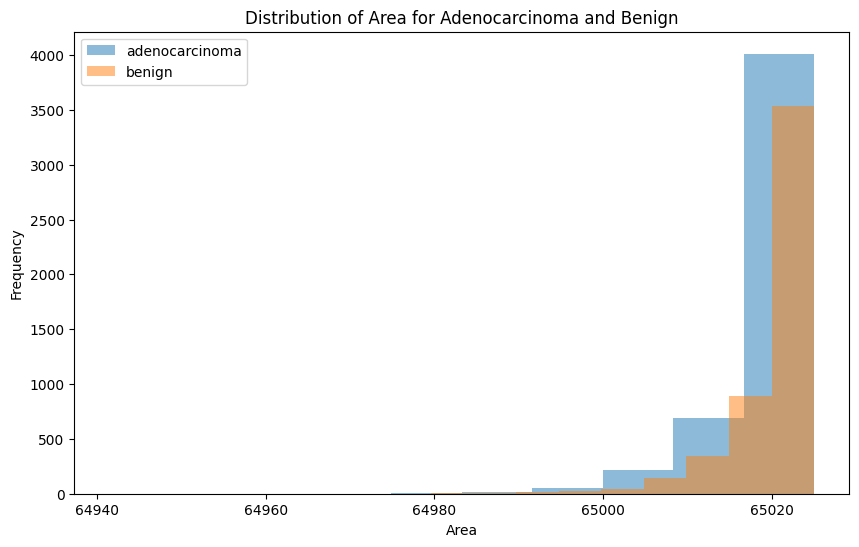

In [9]:
import matplotlib.pyplot as plt

# Assuming 'adenocarcinoma' and 'benign' are the two classes in the 'labels' column
classes = ['adenocarcinoma', 'benign']

# Columns for which histograms need to be plotted
columns_of_interest = ['LBP', 'Num_Holes', 'Compactness', 'Elongation', 'Perimeter', 'Area']

# Visualize distributions for each feature
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))

    for class_label in classes:
        # Filter DataFrame for the current class
        class_data = df_all_features[df_all_features['labels'] == class_label][column]

        # Plot histogram
        plt.hist(class_data, alpha=0.5, label=class_label)

    plt.title(f'Distribution of {column} for Adenocarcinoma and Benign')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [10]:
# Assuming 'adenocarcinoma' and 'benign' are the two classes in the 'labels' column
classes = ['adenocarcinoma', 'benign']

# Columns for which averages need to be calculated
columns_of_interest = ['LBP', 'Num_Holes', 'Compactness', 'Elongation', 'Perimeter', 'Area']

# Calculate averages for each feature and each class
for class_label in classes:
    class_data = df_all_features[df_all_features['labels'] == class_label][columns_of_interest]
    class_means = class_data.mean()
    
    print(f"\nAverage features for {class_label}:\n{class_means}\n")



Average features for adenocarcinoma:
LBP                0.690850
Num_Holes        322.670800
Compactness        1.282832
Elongation         0.001120
Perimeter       1023.782698
Area           65019.868000
dtype: float64


Average features for benign:
LBP                0.684745
Num_Holes        247.748400
Compactness        1.281583
Elongation         0.000941
Perimeter       1023.293260
Area           65020.524800
dtype: float64



In [8]:
# Print the top 10 rows from the 'images' column
print(df_all_features['images'].head(10).tolist())

['/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca1.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca2.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca3.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca4.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca5.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca6.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca7.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca8.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca9.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca10.jpeg']


In [33]:
print(df_all_features['images'].tail(10).tolist())

['/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4991.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4992.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4993.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4994.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4995.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4996.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4997.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4998.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn4999.jpeg', '/Users/jazlyn/dip project/thresholded copy/colon_nt/colon_n/binary3/colonn5000.jpeg']


In [ ]:
/Users/jazlyn/dip project/thresholded copy/colon_acat/colon_aca/binary3/colonca1.jpeg

# resnet18

/Users/jazlyn/dip project/venv2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jazlyn/dip project/venv2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10, Training Loss: 90.05680056716595, Training Accuracy: 0.63925
Validation Loss: 0.30237101855011855, Validation Accuracy: 0.986
Epoch 2/10, Training Loss: 26.843700814974333, Training Accuracy: 0.76575
Validation Loss: 0.09661042736843217, Validation Accuracy: 0.999
Epoch 3/10, Training Loss: 10.222585650429533, Training Accuracy: 0.89825
Validation Loss: 4.9719868743857205, Validation Accuracy: 0.95
Epoch 4/10, Training Loss: 14.944458253723857, Training Accuracy: 0.862
Validation Loss: 0.7097464815014961, Validation Accuracy: 0.992
Epoch 5/10, Training Loss: 2.7168513147084012, Training Accuracy: 0.97325
Validation Loss: 0.3387040010190958, Validation Accuracy: 0.997
Epoch 6/10, Training Loss: 0.6282529251303058, Training Accuracy: 0.9915
Validation Loss: 2.2277416120050293, Validation Accuracy: 0.978
Epoch 7/10, Training Loss: 0.9664015519160506, Training Accuracy: 0.98775
Validation Loss: 0.24862134456634521, Validation Accuracy: 0.998
Epoch 8/10, Training Loss: 0.1693243

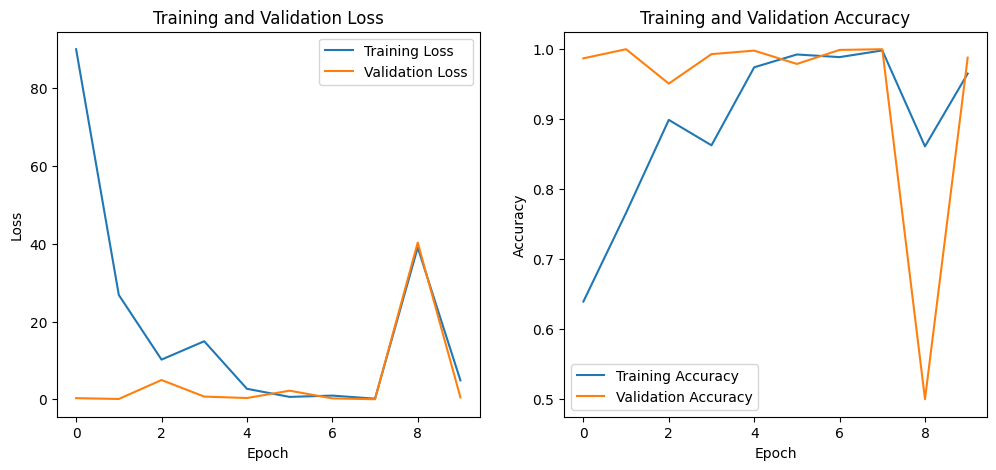

Confusion Matrix:
[[478  22]
 [  0 500]]


TypeError: object of type 'numpy.int64' has no len()

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import urllib

# Manually download ResNet-18 model weights
resnet_url = 'http://download.pytorch.org/models/resnet18-5c106cde.pth'
resnet_path = 'resnet18-5c106cde.pth'
urllib.request.urlretrieve(resnet_url, resnet_path)

# Assuming df_all_features is already loaded

# Label encoding for the 'labels' column
label_encoder = LabelEncoder()
df_all_features['labels'] = label_encoder.fit_transform(df_all_features['labels'])

train_df, test_val_df = train_test_split(df_all_features, test_size=0.2, stratify=df_all_features['labels'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.5, stratify=train_df['labels'], random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['labels'], random_state=42)

# Custom dataset class for CNN with features
class CustomDatasetCNN(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['labels'], dtype=torch.long)
        features = torch.tensor(self.dataframe.iloc[idx, 3:].values.astype(np.float32))

        if self.transform:
            image = self.transform(image)

        return image, features, label

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load ResNet-18 model with manually downloaded weights
resnet18 = models.resnet18(pretrained=False)  # Set pretrained to False since we are loading weights manually
resnet18.load_state_dict(torch.load(resnet_path))

# Remove the last fully connected layer
resnet18 = nn.Sequential(*list(resnet18.children())[:-1])

# Additional fully connected layer for features
num_input_features = len(train_df.columns) - 3  # Assuming the first 3 columns are image path, label, and features
features_fc = nn.Linear(num_input_features, 64)

# Combined model with features
class CNNModelWithFeatures(nn.Module):
    def __init__(self, num_classes):
        super(CNNModelWithFeatures, self).__init__()

        self.resnet18 = resnet18
        self.features_fc = features_fc
        self.fc = nn.Linear(512 + 64, num_classes)

    def forward(self, x, features):
        x = self.resnet18(x)
        x = x.view(x.size(0), -1)

        # Pass features through an additional fully connected layer
        features = self.features_fc(features)

        # Concatenate image features and additional features
        combined_features = torch.cat((x, features), dim=1)

        # Final classification layer
        x = self.fc(combined_features)
        return x

# Create instances of custom datasets and dataloaders
train_dataset = CustomDatasetCNN(train_df, transform=transform)
val_dataset = CustomDatasetCNN(val_df, transform=transform)
test_dataset = CustomDatasetCNN(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModelWithFeatures(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training loss and test accuracy for plotting
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images, features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate and store average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_images, val_features, val_labels in val_loader:
            val_outputs = model(val_images, val_features)
            val_loss = criterion(val_outputs, val_labels)
            running_val_loss += val_loss.item()

            _, val_predicted = torch.max(val_outputs, 1)
            total_val += val_labels.size(0)
            correct_val += (val_predicted == val_labels).sum().item()

    # Calculate and store average validation loss and accuracy
    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Test the model
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for test_images, test_features, test_labels in test_loader:
        test_outputs = model(test_images, test_features)
        _, test_predicted = torch.max(test_outputs, 1)
        total_test += test_labels.size(0)
        correct_test += (test_predicted == test_labels).sum().item()

# Calculate and print test accuracy
test_accuracy = correct_test / total_test
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Store accuracy for plotting
test_accuracy_list.append(test_accuracy)

# Plotting the loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Print confusion matrix and classification report
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, features, labels in test_loader:
        outputs = model(images, features)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_names = list(label_encoder.classes_)
class_report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import urllib

# Manually download ResNet-18 model weights
resnet_url = 'http://download.pytorch.org/models/resnet18-5c106cde.pth'
resnet_path = 'resnet18-5c106cde.pth'
urllib.request.urlretrieve(resnet_url, resnet_path)

# Assuming df_all_features is already loaded
# Assuming df_all_features has columns: 'image_path', 'labels', and other features

# Label encoding for the 'labels' column
label_encoder = LabelEncoder()
df_all_features['labels'] = label_encoder.fit_transform(df_all_features['labels'])

# Get the class names after label encoding
class_names = list(label_encoder.classes_)

# Split the data into training, validation, and test sets
train_df, test_val_df = train_test_split(df_all_features, test_size=0.2, stratify=df_all_features['labels'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.5, stratify=train_df['labels'], random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['labels'], random_state=42)

# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx, 1], dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Create instances of custom datasets and dataloaders
train_dataset = CustomDataset(train_df, transform=transform)
val_dataset = CustomDataset(val_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=2):
        super(CNNModel, self).__init__()
        resnet18 = models.resnet18(pretrained=False)  # Set pretrained to False since we are loading weights manually
        resnet18.load_state_dict(torch.load(resnet_path))
        self.features = nn.Sequential(*list(resnet18.children())[:-1])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
 
# Initialize the model, loss function, and optimizer
model = CNNModel(num_classes=len(class_names))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

# Test the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Evaluate and print performance metrics
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Convert labels back to original class names
decoded_labels = label_encoder.inverse_transform(all_labels)
decoded_predictions = label_encoder.inverse_transform(all_predictions)

# Print confusion matrix
conf_matrix = confusion_matrix(decoded_labels, decoded_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(decoded_labels, decoded_predictions, target_names=class_names)
print("Classification Report:")
print(class_report)


/Users/jazlyn/dip project/venv2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jazlyn/dip project/venv2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/2, Loss: 0.05900326077453792
Epoch 2/2, Loss: 0.006692477222457456
Accuracy on the test set: 99.80%
Confusion Matrix:
[[500   0]
 [  2 498]]


TypeError: object of type 'numpy.int64' has no len()